#  BCB 546X: Python Assignment Details

## Your Mission: Complete Python code in a Jupyter Notebook

## Python Translate Script

#### Here's the start of our Python script. Thanks for completing it for me! - Dr. X
#### IMPORTANT: install BioPython so that this will work

In [1]:
#installs BioPython in current Jupyter kernel
#adapted from https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
#import sys
#!conda install --yes --prefix {sys.prefix} biopython

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

### FUNCTIONS ###

### 1: Collecting information
Dr. X: this gets sequences

Please finish documenting this function with comments, or in notebook markdown text.

Your descriptions of all functions should contain information about what the function does,
as well as information about the return types and arguments.

In [3]:
def get_sequences_from_file(fasta_fn):  # we are creating a function called 'get_sequences_from_file' 
                                        # and defining an argument called 'fasta_fn' for the input files   
    sequence_data_dict = {}  # this creates an empty dictionary called 'sequence_data_dict'
    for record in SeqIO.parse(fasta_fn, "fasta"):  # starting a 'for' loop that will iterate
                                                   # through the input file treating it as a fasta file
        description = record.description.split()  # takes each entry in the fasta file and splits at the spaces
                                                  # and temporarliy assigns it as a list called 'description'
        species_name = description[1] + " " + description[2]  # creates the name of each species for the dictionary
                                                              # by taking the second and third items separated by a 
                                                              # space and assigns it to 'species_name'
        sequence_data_dict[species_name] = record.seq  # creates a dictionary for the fasta file with the 'species_name'
                                                       # as the key and associated sequence as the value
    return(sequence_data_dict)  # returns the dictionary with the collection of species and sequences

In [4]:
bears_dict = get_sequences_from_file(fasta_fn='bears_cytb.fasta')
bears_dict

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

### 2: YOUR STRING-TRANSLATE FUNCTION
Write a function that translates sequences
All sequences start at codon position 1
Complete a function that translates using a loop over the string of nucleotides
Here is  some pseudo-code and suggestions
feel free to change the function and variable names

In [5]:
def translate_function(string_nucleotides):  # we are creating a function called 'translate_function' 
                                             # and defining an argument called 'string_nucleotides' for the input files
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # assigns the "Vertebrate Mitochondrial"
                                                                                 # as 'mito_table' and will be used as the
                                                                                 # key to translate codons
#    if type(string_nucleotides) == str:    
#        nuc_seq = Seq(string_nucleotides)  
#    else:               
#        nuc_seq = string_nucleotides
#    if 
    start = string_nucleotides.find('ATG')  # adapted from https://stackoverflow.com/questions/19521905/translation-dna-to-protein
    seq_start = string_nucleotides[start:]

    aa_seq_string = ''
    for base in range(0,len(seq_start)-3,3):
        codon = seq_start[base:base+3]
        if codon in mito_table.stop_codons:
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa        
    return(aa_seq_string)

In [6]:
seq = 'ATGTATCTAGCAGTACGATACGGGATTAGG'   
translate_function(string_nucleotides= seq)

'MYLAVRYGI'

### 3: YOUR ALTERNATIVE FUNCTION
Is there a better way to write the translation function? (Hint: yes there is.) 
Perhaps using available BioPython library utilities?
Please also write this function.

In [7]:
# adapted from http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

In [8]:
def translate_nucleotides(string_nucleotides):  # we are creating a function called 'translate_function_ez' 
                                                 # and defining an argument called 'string_nucleotides' for the input files
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna)
    aa_seq_string = print(coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True))
    return(aa_seq_string)

In [9]:
translate_nucleotides('ATGACATATCATCATCATGAAAGG')

MTYHHHE


In [10]:
def translate_Seq(Seq_object):  # we are creating a function called 'translate_function_ez' 
                                                 # and defining an argument called 'string_nucleotides' for the input files
    coding_dna = Seq_object
    aa_seq_string = coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(aa_seq_string)

In [11]:
translate_Seq(bears_dict['Helarctos malayanus'])

Seq('MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGVCLILQIMTGLFLAMH...SKW', ExtendedIUPACProtein())

### 4: YOUR COUNT AA ANALYSIS FUNCTION
Write a function that calculates the molecular weight of each amino acid sequence.

For this, you can use some BioPython functions. I think you can use the ProtParam module.

For more info, check this out: http://biopython.org/wiki/ProtParam

So you should import the following before defining your function:

In [12]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [13]:
def compute_mw_Seq(Seq_object):
    my_seq = translate_Seq(Seq_object)
    analysed_seq = ProteinAnalysis(str(my_seq))
    molecular_weight = analysed_seq.molecular_weight()
    return molecular_weight

In [14]:
compute_mw_Seq(bears_dict['Helarctos malayanus'])

42560.89100000001

In [15]:
def compute_mw_nucleotide(aa_seq):
#    my_seq = translate_Seq(Seq_object)
#    if type(aa_seq) == str:
#        analysed_seq = ProteinAnalysis(aa_seq)  # run the ProteinAnalysis() function on my_seq
#    else:
#        analysed_seq = ProteinAnalysis(str(aa_seq))
    analysed_seq = ProteinAnalysis(str(aa_seq))
    molecular_weight = analysed_seq.molecular_weight()
    return molecular_weight

In [16]:
compute_mw_nucleotide('MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGVCLILQIMTGLFLAMHYTSDTTTAFSSITHICRDVHYGWIIRYMHANGASMFFICLFMHVGRGLYYGSYLFSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWVWGGFSVDKATLTRFFAFHFILPFIILALTAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLTLALTTLVLFSPDLLGDPDNYIPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALVFSILILAIIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFTIIGQLASILYFMIFLVFMPIAGIIENNLSKW')

42560.89100000001

### 5: YOUR GC CONTENT ANALYSIS FUNCTION
Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [17]:
# http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html#GC
from Bio.SeqUtils import GC

In [18]:
def compute_GC_Seq(Seq_object):
    GC_content = GC(Seq_object)
    return GC_content

In [19]:
compute_GC_Seq(bears_dict['Helarctos malayanus'])

44.29824561403509

##   MAIN

In [20]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)
bears_df

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


### 6: Adding columns
Add two new columns to the bears DataFrame: 

    (1) molecular weight
    (2) GC content.
    
Set the value to 'NaN' to indicate that these cells are currently empty.

In [21]:
import numpy as np

In [22]:
bears_df['molecular_weight'] = np.nan
bears_df['GC_content'] = np.nan
bears_df

,species,mass,molecular weight,GC content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


### 7: Creating new DataFrames
Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [23]:
for key, value in bears_dict.items():
    #aa_seq = translate_Seq(value)   # whichever function you prefer of #2 or #3
    bears_df.loc[bears_df.species == key, 'molecular_weight'] = compute_mw_Seq(value)
    bears_df.loc[bears_df.species == key, 'GC_content'] = compute_GC_Seq(value)
bears_df

,species,mass,molecular weight,GC content
0,Ursus spelaeus,550.800,42458.7992,43.771930
1,Ursus arctos,203.500,42414.7435,43.771930
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.9900,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


### 8: Plotting a bar-chart
Plot a bar-chart of the mass with the x-axes labeled with species names.

*Q1* What is the largest bear species? 

*Q2* What else is interesting about this species?

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

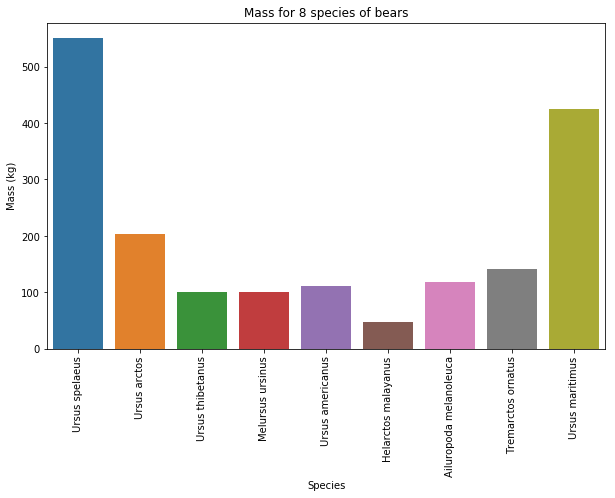

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=bears_df, x='species', y='mass')
ax.set(xlabel='Species', ylabel='Mass (kg)')
plt.title("Mass for 8 species of bears")
plt.xticks(rotation=90)  # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

### 9: Plotting a scatterplot
Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

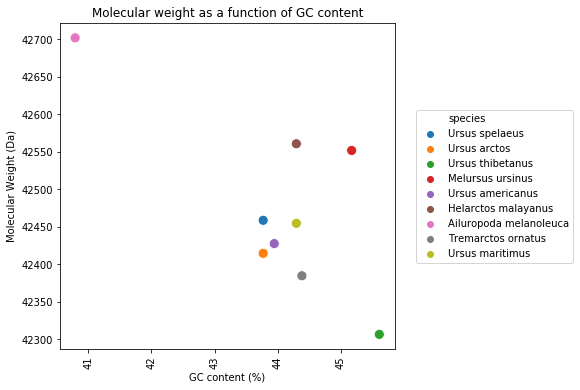

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=bears_df, x='GC_content', y='molecular_weight', s=100, hue='species')
ax.set(xlabel='GC content (%)', ylabel='Molecular Weight (Da)')
plt.title("Molecular weight as a function of GC content")
plt.xticks(rotation=90)  # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.legend(bbox_to_anchor=(1.05, 0.75), loc=2)  # adapted from https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

### 10: Saving new files
Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [27]:
bears_df.to_csv('bears_df.csv')

### 11 - BONUS
What else can we do with this dataset in Python? 
Add functions or anything that might be interesting and fun. (optional)